Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158597,111499.0,1.753695,0.018874,-0.429072,4.161717,0.215270,0.811187,-0.328388,0.124104,1.297017,...,-0.059761,0.046540,0.032887,0.375723,0.050400,0.075297,-0.062722,-0.037895,89.03,0.0
158598,111499.0,-0.223112,0.969299,0.774386,-0.162188,0.134878,-1.627333,0.917096,-0.396720,1.209086,...,-0.337662,-0.560819,0.282673,0.869122,-0.610198,0.034188,0.098540,0.091763,1.79,0.0
158599,111499.0,-0.324219,1.078371,-0.661833,-1.060278,1.553663,-1.123551,1.788409,-0.653065,0.899690,...,0.053192,0.870073,-0.223665,-0.390476,-0.264169,0.032943,0.325164,0.093798,31.00,0.0
158600,111500.0,-0.909674,1.204345,-0.038838,0.528709,2.760196,1.270910,0.929798,0.373622,0.090421,...,-0.066235,0.123375,-0.538330,-0.920971,0.985594,-0.251958,0.046382,0.055573,1.00,0.0
158601,111502.0,1.939272,-0.528638,-0.457417,0.289690,-0.413718,0.061268,-0.754919,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158602 entries, 0 to 158601
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    158602 non-null  float64
 1   V1      158602 non-null  float64
 2   V2      158602 non-null  float64
 3   V3      158602 non-null  float64
 4   V4      158602 non-null  float64
 5   V5      158602 non-null  float64
 6   V6      158602 non-null  float64
 7   V7      158602 non-null  float64
 8   V8      158601 non-null  float64
 9   V9      158601 non-null  float64
 10  V10     158601 non-null  float64
 11  V11     158601 non-null  float64
 12  V12     158601 non-null  float64
 13  V13     158601 non-null  float64
 14  V14     158601 non-null  float64
 15  V15     158601 non-null  float64
 16  V16     158601 non-null  float64
 17  V17     158601 non-null  float64
 18  V18     158601 non-null  float64
 19  V19     158601 non-null  float64
 20  V20     158601 non-null  float64
 21  V21     15

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_card_data.dropna(inplace=True)

In [ ]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


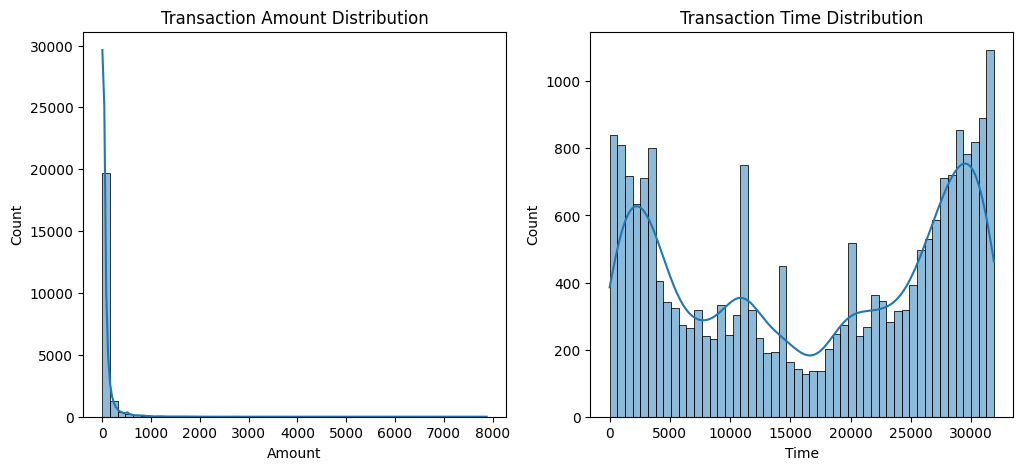

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.subplot(1,2,2)
sns.histplot(credit_card_data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()


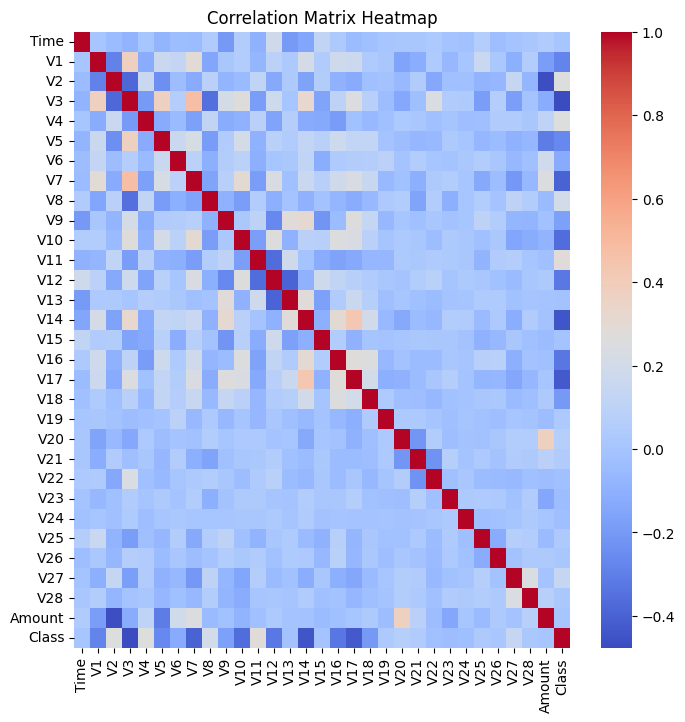

Class     1.000000
V3       -0.476294
V14      -0.441833
V17      -0.426317
V7       -0.395674
V10      -0.363563
V16      -0.327048
V12      -0.321828
V1       -0.285602
V11       0.284211
V5       -0.263605
V4        0.261522
V2        0.259959
V18      -0.201947
V8        0.200598
V9       -0.175465
V27       0.135965
V6       -0.124538
V20       0.065875
V21       0.042885
V23      -0.041799
V25       0.032147
V19       0.029348
V24      -0.029307
V22      -0.024029
V28       0.022922
V26       0.017745
V13      -0.009892
V15      -0.009043
Amount    0.006824
Time      0.003817
Name: Class, dtype: float64


In [ ]:
for column in credit_card_data.columns:
    credit_card_data[column] = pd.to_numeric(credit_card_data[column], errors='coerce')
plt.figure(figsize=(8,8))
corr = credit_card_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

corr_with_class = corr['Class'].sort_values(key=abs, ascending=False)
print(corr_with_class)


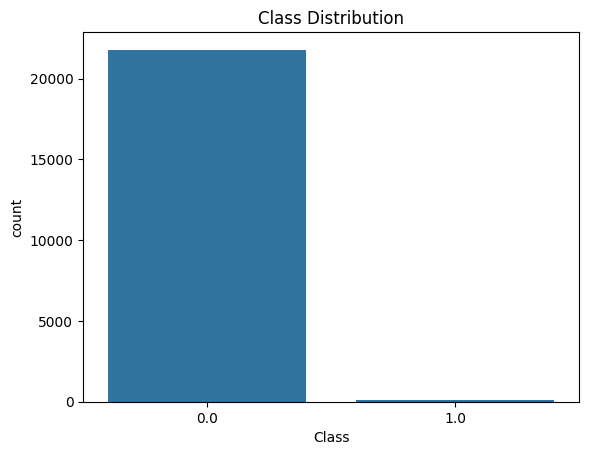

In [ ]:
#Visualize Class Imbalance
sns.countplot(x='Class', data=credit_card_data)
plt.title('Class Distribution')
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,158245
1.0,356


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(21791, 31)
(86, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,21791.000000
mean,71.637403
std,204.790148
min,0.000000
25%,5.990000
50%,17.500000
75%,62.120000
max,7879.420000


In [ ]:
fraud.Amount.describe()

,Amount
count,86.000000
mean,93.996860
std,260.195133
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,16920.948098,-0.207315,0.197324,0.790011,0.238431,-0.151823,0.097864,-0.108141,0.001903,0.576156,...,0.036815,-0.045323,-0.139174,-0.036473,0.011836,0.124802,0.028728,0.008602,0.005937,71.637403
1.0,17592.162791,-8.792044,6.504115,-12.461366,6.302522,-6.112129,-2.534417,-8.479521,4.438385,-3.005413,...,0.704824,0.536947,-0.386820,-0.379114,-0.264854,0.349233,0.177437,0.867258,0.096510,93.996860


<Figure size 1200x800 with 0 Axes>

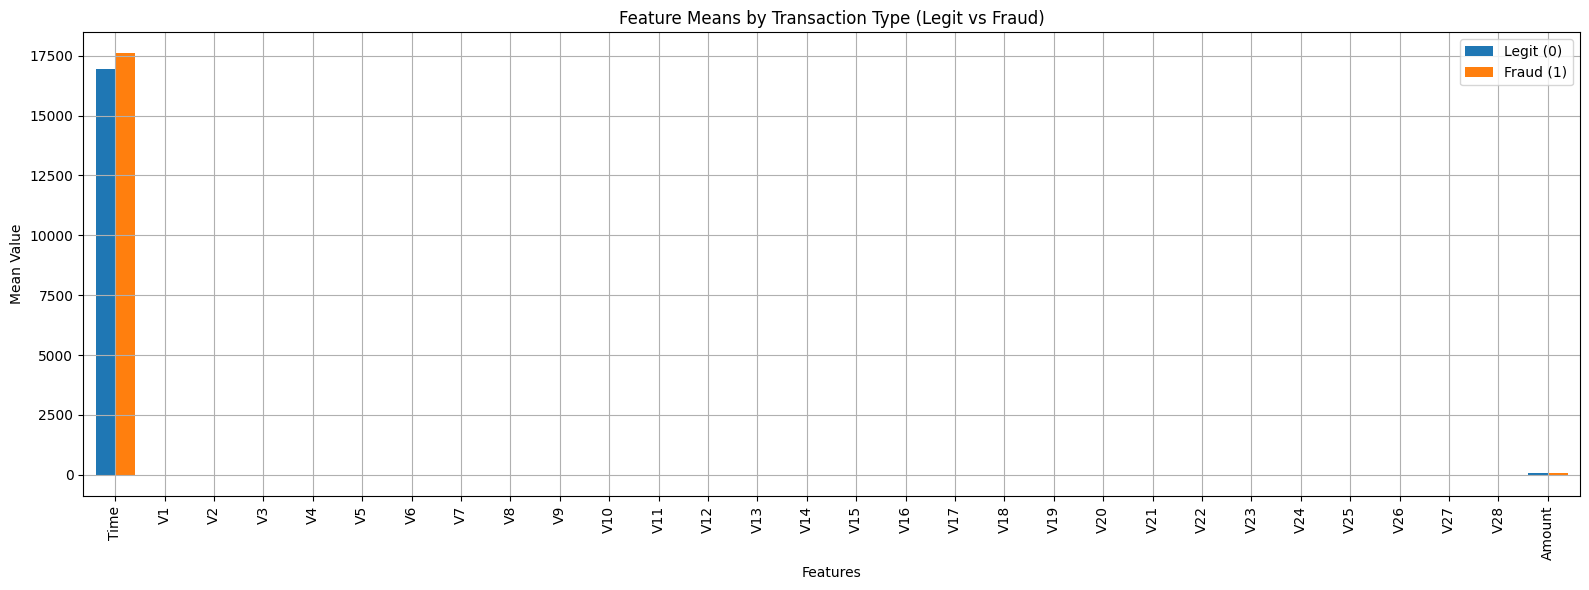

In [ ]:
mean_values = credit_card_data.groupby('Class').mean().T  # transpose for plotting
plt.figure(figsize=(12, 8))
mean_values.plot(kind='bar', figsize=(16, 6), width=0.8)
plt.title('Feature Means by Transaction Type (Legit vs Fraud)')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.legend(['Legit (0)', 'Fraud (1)'])
plt.tight_layout()
plt.grid(True)
plt.show()

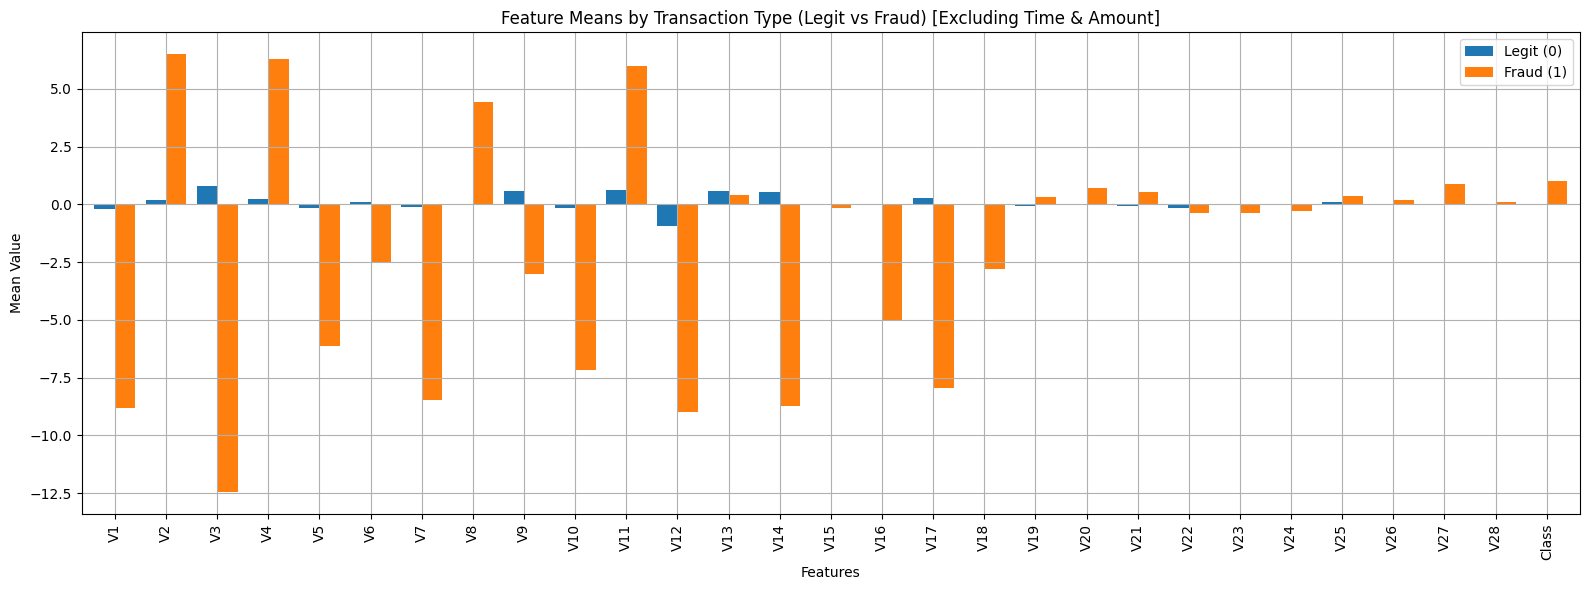

In [ ]:
# Drop 'Time' and 'Amount' for better visibility
mean_values = credit_card_data.drop(['Time', 'Amount'], axis=1).groupby(credit_card_data['Class']).mean().T

# Plot again
mean_values.plot(kind='bar', figsize=(16, 6), width=0.8)
plt.title('Feature Means by Transaction Type (Legit vs Fraud) [Excluding Time & Amount]')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.legend(['Legit (0)', 'Fraud (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.pipeline import make_pipeline

In [ ]:
#SPLITTING DATA
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#SCALING FEATURES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SUPERVISED MODELS


In [ ]:
print("Logistic Regression")
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
 # Predict class labels
y_pred_log = logreg.predict(X_test_scaled)
# Predict probabilities
y_proba_log = logreg.predict_proba(X_test_scaled)
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]))
print("Log Loss:", log_loss(y_test, y_proba_log))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9605494455801453
Log Loss: 0.0044979939796872415


In [ ]:
print("Random Forest")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 uses all cores
X_sampled, _, y_sampled, _ = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)

rf.fit(X_sampled, y_sampled)

# Predict on full test set
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print("Log Loss:", log_loss(y_test, rf.predict_proba(X_test)))

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9476614629391431
Log Loss: 0.007587952699816393


UNSUPERVISED MODELS

In [ ]:
print("Isolation Forest")
iso = IsolationForest(contamination=0.001, random_state=42)
y_pred_iso = iso.fit_predict(X_test_scaled)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]
print(classification_report(y_test, y_pred_iso))

Isolation Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.15      0.19        98

    accuracy                           1.00     56962
   macro avg       0.63      0.58      0.60     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print("One-Class SVM")
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

#Reduce dimensionality for speed
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Use only normal (non-fraud) transactions to train the model
normal_data_pca = X_train_pca[y_train == 0]
normal_sample = normal_data_pca[:10000]
# Sample first 10,000 normal transactions
print("One-Class SVM (with PCA & sampling)")
#Train the One-Class SVM
ocsvm = OneClassSVM(nu=0.001, kernel="rbf", gamma='scale')
ocsvm.fit(normal_sample)
#Predict on the full test set
y_pred_ocsvm = ocsvm.predict(X_test_pca)
#Convert outputs to binary: -1 = anomaly/fraud (1), 1 = normal (0)
y_pred_ocsvm = [1 if p == -1 else 0 for p in y_pred_ocsvm]
#Evaluate
print(classification_report(y_test, y_pred_ocsvm))


One-Class SVM
One-Class SVM (with PCA & sampling)
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.79      0.07        98

    accuracy                           0.97     56962
   macro avg       0.52      0.88      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
print("Heuristic Rule-Based Detector")
# Example: Flag if amount is unusually high at odd hours
high_amount = X_test['Amount'] > 2000
hours = (X_test['Time'] % 86400) / 3600
odd_hours = (hours < 6) | (hours > 22)
y_pred_heuristic = (high_amount & odd_hours).astype(int)
print(classification_report(y_test, y_pred_heuristic))

Heuristic Rule-Based Detector
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss

print("Model Performance Summary")

# Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
log_loss_log = log_loss(y_test, logreg.predict_proba(X_test_scaled))

print(f"\nLogistic Regression:")
print(f"Accuracy: {acc_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1 Score: {f1_log:.4f}")
print(f"ROC AUC: {roc_auc_log:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_log}")
print(f"Log Loss: {log_loss_log:.4f}")

# Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, rf.predict_proba(X_test))

print(f"\nRandom Forest:")
print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Log Loss: {log_loss_rf:.4f}")

# Isolation Forest
acc_iso = accuracy_score(y_test, y_pred_iso)
precision_iso = precision_score(y_test, y_pred_iso)
recall_iso = recall_score(y_test, y_pred_iso)
f1_iso = f1_score(y_test, y_pred_iso)
roc_auc_iso = roc_auc_score(y_test, y_pred_iso)
conf_matrix_iso = confusion_matrix(y_test, y_pred_iso)

print(f"\nIsolation Forest:")
print(f"Accuracy: {acc_iso:.4f}")
print(f"Precision: {precision_iso:.4f}")
print(f"Recall: {recall_iso:.4f}")
print(f"F1 Score: {f1_iso:.4f}")
print(f"ROC AUC: {roc_auc_iso:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_iso}")

# One-Class SVM
acc_ocsvm = accuracy_score(y_test, y_pred_ocsvm)
precision_ocsvm = precision_score(y_test, y_pred_ocsvm)
recall_ocsvm = recall_score(y_test, y_pred_ocsvm)
f1_ocsvm = f1_score(y_test, y_pred_ocsvm)
roc_auc_ocsvm = roc_auc_score(y_test, y_pred_ocsvm)
conf_matrix_ocsvm = confusion_matrix(y_test, y_pred_ocsvm)

print(f"\nOne-Class SVM:")
print(f"Accuracy: {acc_ocsvm:.4f}")
print(f"Precision: {precision_ocsvm:.4f}")
print(f"Recall: {recall_ocsvm:.4f}")
print(f"F1 Score: {f1_ocsvm:.4f}")
print(f"ROC AUC: {roc_auc_ocsvm:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_ocsvm}")

# Heuristic Rule-Based
acc_heuristic = accuracy_score(y_test, y_pred_heuristic)
precision_heuristic = precision_score(y_test, y_pred_heuristic)
recall_heuristic = recall_score(y_test, y_pred_heuristic)
f1_heuristic = f1_score(y_test, y_pred_heuristic)
roc_auc_heuristic = roc_auc_score(y_test, y_pred_heuristic)
conf_matrix_heuristic = confusion_matrix(y_test, y_pred_heuristic)

print(f"\nHeuristic Rule-Based:")
print(f"Accuracy: {acc_heuristic:.4f}")
print(f"Precision: {precision_heuristic:.4f}")
print(f"Recall: {recall_heuristic:.4f}")
print(f"F1 Score: {f1_heuristic:.4f}")
print(f"ROC AUC: {roc_auc_heuristic:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_heuristic}")


Model Performance Summary

Logistic Regression:
Accuracy: 0.9991
Precision: 0.8267
Recall: 0.6327
F1 Score: 0.7168
ROC AUC: 0.8162
Confusion Matrix:
[[56851    13]
 [   36    62]]
Log Loss: 0.0045

Random Forest:
Accuracy: 0.9995
Precision: 0.9059
Recall: 0.7857
F1 Score: 0.8415
ROC AUC: 0.8928
Confusion Matrix:
[[56856     8]
 [   21    77]]
Log Loss: 0.0076

Isolation Forest:
Accuracy: 0.9978
Precision: 0.2679
Recall: 0.1531
F1 Score: 0.1948
ROC AUC: 0.5762
Confusion Matrix:
[[56823    41]
 [   83    15]]

One-Class SVM:
Accuracy: 0.9652
Precision: 0.0378
Recall: 0.7857
F1 Score: 0.0721
ROC AUC: 0.8756
Confusion Matrix:
[[54903  1961]
 [   21    77]]

Heuristic Rule-Based:
Accuracy: 0.9980
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.4999
Confusion Matrix:
[[56848    16]
 [   98     0]]


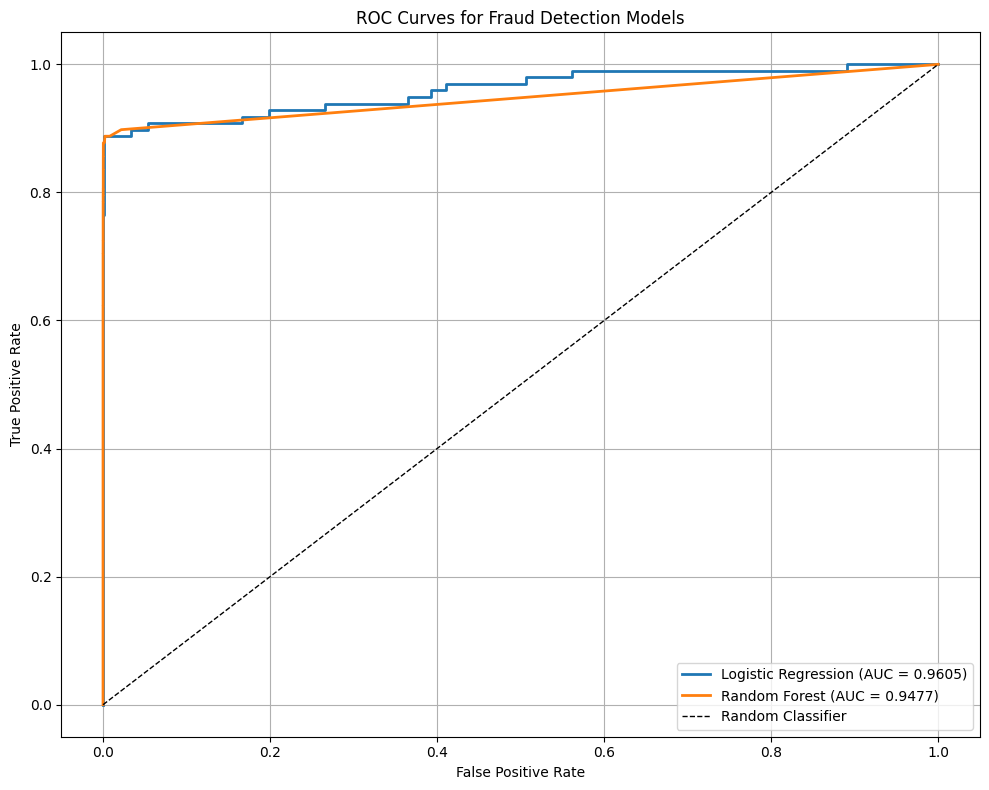

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)



# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Fraud Detection Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
